#### Short notebook to investaogate wether AROME and buoy have same autocorr

In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy import stats

In [2]:
path_data = "../dataset/"
buoys_df = pd.read_csv(f"{path_data}prepared_buoy_data.csv", index_col=[0, 1])

kvs_10 = buoys_df.loc['KVS_SvalMIZ_10'].dropna()
kvs_10_index = kvs_10.index.values
kvs_10_t1m = np.array(kvs_10['temp_air'].values)
kvs_10_t2m = np.array(kvs_10['arome_t2m'].values)

In [3]:
def autocorr(x):
    n = x.shape[0]
    x_mean = np.mean(x)
    denom = np.sum((x - x_mean)**2) / n
    r_L = np.zeros_like(x)

    for L in range(n):
        x_static = x[:x.shape[0]-L]
        x_shifted = x[L:]
        nom = (1. / (n - L)) * np.sum((x_static - x_mean) * (x_shifted - x_mean))
        
        r_L[L] = (nom / denom)
    
    return r_L

In [9]:
r_L_t1m = autocorr(kvs_10_t1m)
r_L_t2m = autocorr(kvs_10_t2m)

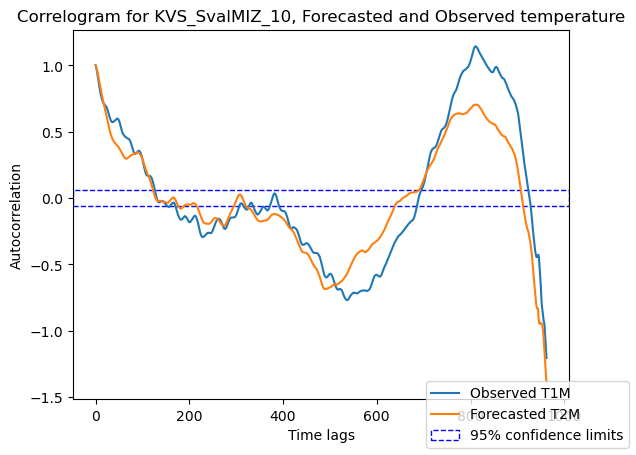

In [15]:
fig, ax = plt.subplots(nrows = 1)
ax.plot(r_L_t1m, label = 'Observed T1M')
ax.plot(r_L_t2m, label = 'Forecasted T2M')
ax.set_title('Correlogram for KVS_SvalMIZ_10, Forecasted and Observed temperature')
ax.set_xlabel('Time lags')
ax.set_ylabel('Autocorrelation')

# 95% confidence level
alpha = .05
n = kvs_10.shape[0]
l = (-1 - stats.norm.ppf(1 - .5 * alpha) * np.sqrt(n - 2)) / (n - 1)
u = (-1 + stats.norm.ppf(1 - .5 * alpha) * np.sqrt(n - 2)) / (n - 1)

ax.axhspan(l, u, ls = '--', ec = 'b', fc = '1', label = r'95% confidence limits')
fig.legend(loc = 'lower right')